In [1]:
#Brad Fortunato


#install necessary packages;tidyverse for ggplot 
#and Biocmanager for complexheatmap

install.packages("tidyverse", repos = "http://cran.us.r-project.org")
library(tidyverse)


also installing the dependencies 'fs', 'rappdirs', 'processx', 'xfun', 'blob', 'lifecycle', 'vctrs', 'glue', 'tidyselect', 'data.table', 'gargle', 'ids', 'rematch2', 'isoband', 'cpp11', 'callr', 'knitr', 'withr', 'ellipsis', 'broom', 'cli', 'crayon', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'ggplot2', 'haven', 'hms', 'httr', 'jsonlite', 'lubridate', 'magrittr', 'modelr', 'pillar', 'purrr', 'readr', 'reprex', 'rlang', 'rstudioapi', 'rvest', 'tibble', 'tidyr', 'xml2'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
knitr       1.31   1.32             FALSE
withr      2.4.1  2.4.2             FALSE
haven      2.3.1  2.4.0              TRUE
tibble     3.1.0  3.1.1              TRUE
tidyverse  1.3.0  1.3.1             FALSE

  Binaries will be installed
package 'fs' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'processx' successfully unpacked and MD5 sums checked
package 'xfun' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'gargle' successfully unpacked a

Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\b42na\Anaconda3\envs\R\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\b42na\Anaconda3\envs\R\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'lubridate' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'modelr' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'reprex' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'rvest' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'xml2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\b42na\AppData\Local\Temp\RtmpIVUcEu\downloaded_packages


installing the source packages 'knitr', 'withr', 'tidyverse'

Warning message in install.packages("tidyverse", repos = "http://cran.us.r-project.org"):
"installation of package 'tidyverse' had non-zero exit status"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filt

package 'BiocManager' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\b42na\AppData\Local\Temp\RtmpIVUcEu\downloaded_packages


ERROR: Error in library(ComplexHeatmap): there is no package called 'ComplexHeatmap'


In [3]:
#read in aorta and kidney data, get headers from each and set those as column names

aorta <- read.table("C:/Users/b42na/Downloads/GSE158197_RawCounts_CS_200225_aorta.txt.gz", skip = 1,  header = FALSE, sep = "", dec = ".")
headers_a <- read.table("C:/Users/b42na/Downloads/GSE158197_RawCounts_CS_200225_aorta.txt.gz", header = F, nrows = 1, as.is = T)
kidney <- read.table("C:/Users/b42na/Documents/Broad Inst/GSE158197_RawCounts_BS_200803_kidney.txt", skip = 1,  header = FALSE, sep = "", dec = ".")
headers_k <- read.table("C:/Users/b42na/Documents/Broad Inst/GSE158197_RawCounts_BS_200803_kidney.txt", header = F, nrows = 1, as.is = T) 
colnames(aorta) <- headers_a
colnames(kidney) <- headers_k

#Picked sox17 gene to compare across the two WT groups; combine into one dataframe (rotating it)

data_ak_rp1 <- aorta[20,5:14] 
data_ak_rp1[nrow(data_ak_rp1) +1,] =  kidney[20,5:14]
df<-as.data.frame(t(data_ak_rp1)) 

#change names of columns

names(df) <- gsub("20", "gene_1", names(df))
names(df) <- gsub("2", "gene_2", names(df))
denom <- rownames(df)
df$names = denom

`geom_smooth()` using formula 'y ~ x'


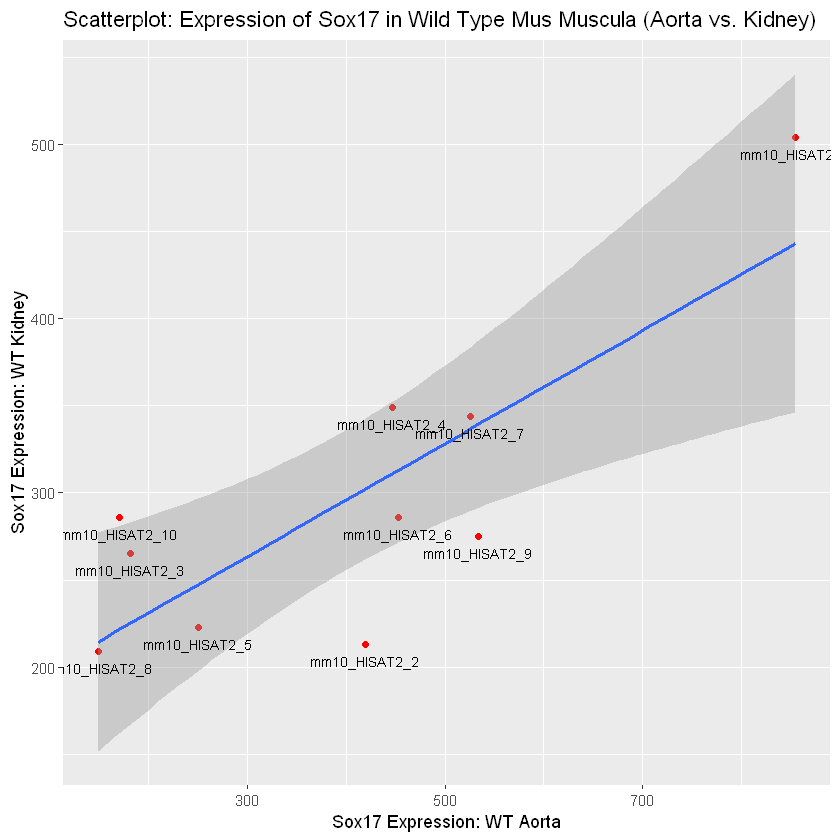

In [4]:
#scatter plot
p <- ggplot(df, aes(x = gene_1, y = gene_2)) + geom_point(color = "red") + geom_smooth(method = 'lm') + 
  geom_text(aes(label = names), vjust=2, size = 3)+
  labs(x = "Sox17 Expression: WT Aorta", y = "Sox17 Expression: WT Kidney", title = "Scatterplot: Expression of Sox17 in Wild Type Mus Muscula (Aorta vs. Kidney)" ) 
show(p)

In [5]:
#pearson correlation test
cor.test(df$gene_1, df$gene_2)


	Pearson's product-moment correlation

data:  df$gene_1 and df$gene_2
t = 3.8663, df = 8, p-value = 0.004766
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3608203 0.9526254
sample estimates:
      cor 
0.8070902 


In [6]:
###################################################################################################

#new data frame; Mrpl15
df2 <- as.data.frame(t(aorta[32,5:14]))
names(df2) <- gsub("32", "gene_3", names(df2))

#add name column
denom <- rownames(df2)
df2$names = denom

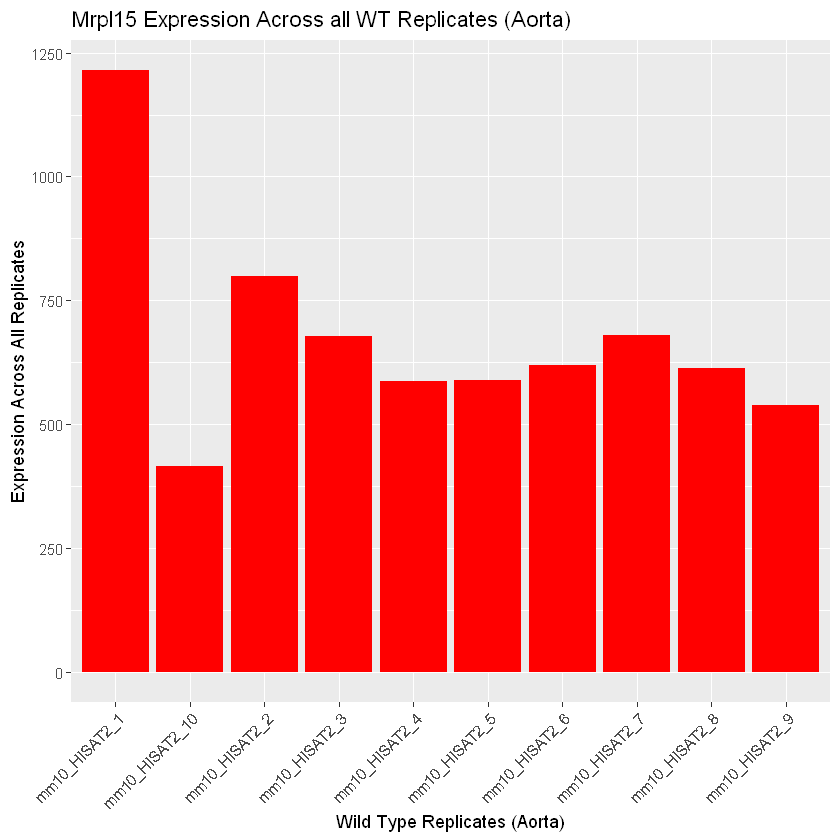

In [7]:
#barplot

b <- ggplot(df2, aes(y = gene_3, x = names,label = "Mrpl15")) + geom_bar(stat = "identity", fill = "red") +   labs(x = "Wild Type Replicates (Aorta)", y = "Expression Across All Replicates", title = "Mrpl15 Expression Across all WT Replicates (Aorta)" ) 

b + theme(axis.text.x = element_text(angle = 45, hjust=1))

Bioconductor version '3.10' is out-of-date; the current release version '3.12'
  is available with R version '4.0'; see https://bioconductor.org/install
'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.10 (BiocManager 1.30.12), R 3.6.1 (2019-07-05)
Installing package(s) 'BiocVersion', 'ComplexHeatmap'
also installing the dependencies 'shape', 'rjson', 'circlize', 'GetoptLong', 'clue', 'GlobalOptions', 'png'




  There is a binary version available but the source version is later:
     binary source needs_compilation
clue 0.3-58 0.3-59              TRUE

  Binaries will be installed
package 'shape' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'circlize' successfully unpacked and MD5 sums checked
package 'GetoptLong' successfully unpacked and MD5 sums checked
package 'clue' successfully unpacked and MD5 sums checked
package 'GlobalOptions' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'BiocVersion' successfully unpacked and MD5 sums checked
package 'ComplexHeatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\b42na\AppData\Local\Temp\RtmpIVUcEu\downloaded_packages


Old packages: 'askpass', 'backports', 'BH', 'boot', 'caret', 'class', 'clipr',
  'clue', 'cluster', 'codetools', 'colorspace', 'curl', 'DBI', 'digest',
  'evaluate', 'fansi', 'foreach', 'formatR', 'generics', 'glmnet', 'gower',
  'haven', 'hexbin', 'highr', 'htmltools', 'htmlwidgets', 'httpuv', 'ipred',
  'IRdisplay', 'IRkernel', 'iterators', 'jsonlite', 'KernSmooth', 'labeling',
  'later', 'lattice', 'lava', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime',
  'ModelMetrics', 'nlme', 'nnet', 'numDeriv', 'openssl', 'pbdZMQ', 'pkgconfig',
  'plyr', 'prettyunits', 'prodlim', 'progress', 'promises', 'ps', 'quantmod',
  'R6', 'Rcpp', 'recipes', 'repr', 'reshape2', 'rmarkdown', 'scales',
  'selectr', 'shiny', 'spatial', 'SQUAREM', 'stringi', 'survival', 'sys',
  'tibble', 'tidyverse', 'tinytex', 'TTR', 'utf8', 'uuid', 'viridisLite',
  'whisker', 'xts', 'yaml', 'zoo'
Loading required package: grid
ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Git

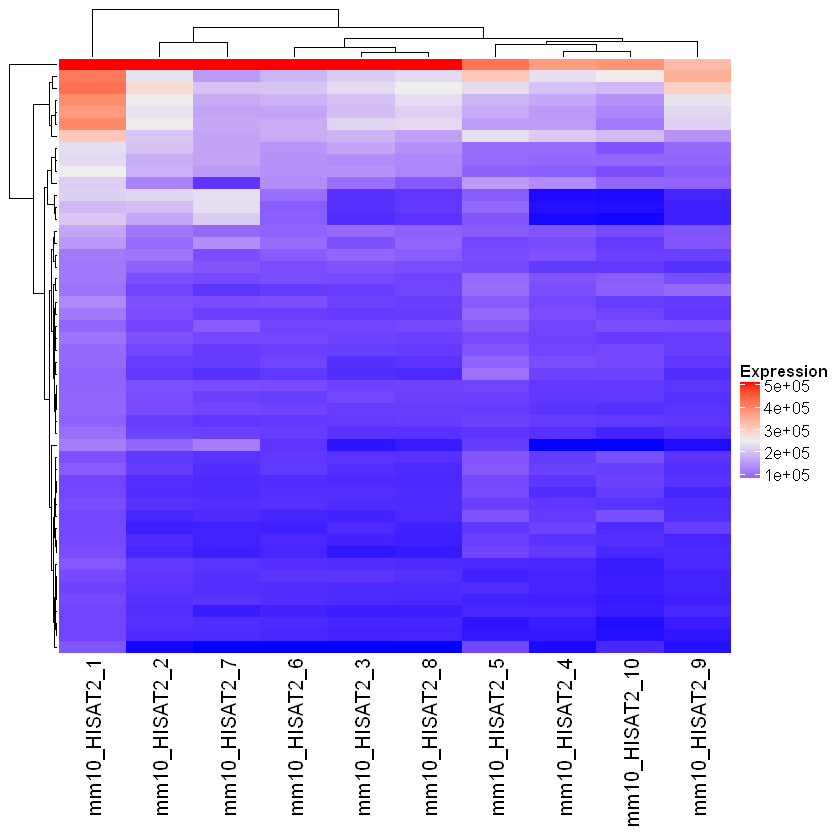

In [11]:
###################################################################################################
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("ComplexHeatmap")
library("ComplexHeatmap")

#Bonus: heatmap of top 50 highest expressed genes (aorta)
df3 <- as.matrix(aorta[,5:14])

#order by high to low, then top 50 cutoff
df3 = df3[order(df3[,1],decreasing=TRUE),] 
df3 <- df3[1:50,]

#heatmap
Heatmap(df3, name = "Expression")
